<a href="https://colab.research.google.com/github/MohammedEsamaldin/Pharmaceutical-Sales-Prediction-across-multiple-stores/blob/main/notebooks/cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install dvc

In [ ]:
! pip install 'dvc[gdrive]'

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import io
import dvc.api
import seaborn as sns

In [6]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
data = dvc.api.read(path='data/store.csv',repo='https://github.com/MohammedEsamaldin/Pharmaceutical-Sales-Prediction-across-multiple-stores.git')
df = pd.read_csv(io.StringIO(data),low_memory=False)

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?client_id=710796635688-iivsgbgsb6uv1fap6635dhvuei09o66c.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.appdata&access_type=offline&response_type=code&approval_prompt=force

Enter verification code: 4/1AdQt8qic5_einMPvnHazUvPjc56vNoyuUPedRcxo8ROoEsiELwlKDcGYaXY
Authentication successful.


In [10]:
df.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [11]:
df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [12]:
df.shape

(1115, 10)

In [13]:
df2 = df.copy()

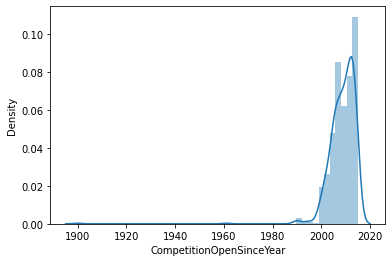

In [14]:
sns.distplot(df2.CompetitionOpenSinceYear)

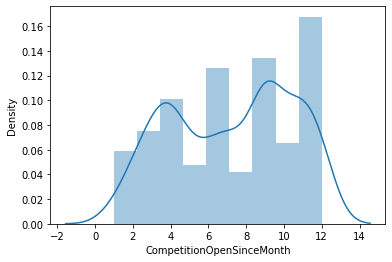

In [15]:
sns.distplot(df2.CompetitionOpenSinceMonth)

In [16]:
df2['CompetitionDistance'] = df2['CompetitionDistance'].fillna(value = df['CompetitionDistance'].mean())

In [17]:
df2['CompetitionOpenSinceMonth']=df2['CompetitionOpenSinceMonth'].fillna(df2['CompetitionOpenSinceMonth'].median())
df2['CompetitionOpenSinceYear']=df2['CompetitionOpenSinceYear'].fillna(df2['CompetitionOpenSinceYear'].median())

In [18]:

df2['Promo2SinceWeek'] = df2['Promo2SinceWeek'].fillna(value = 0 )
df2['Promo2SinceYear'] = df2['Promo2SinceYear'].fillna(value = 0 )
df2['PromoInterval'] = df2['PromoInterval'].fillna(value = 0 )


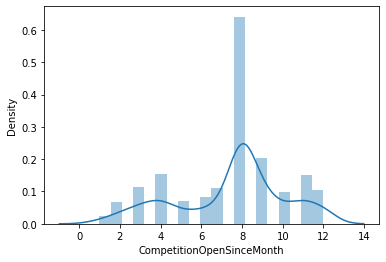

In [19]:
sns.distplot(df2.CompetitionOpenSinceMonth)

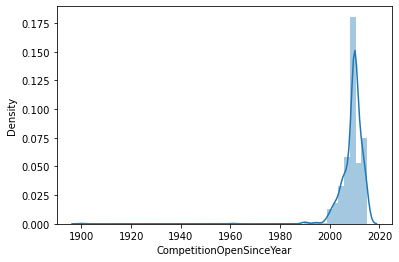

In [20]:
sns.distplot(df2.CompetitionOpenSinceYear)

In [21]:
df2.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [22]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")



In [23]:
percent_missing(df2)

The dataset contains 0.0 % missing values.


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

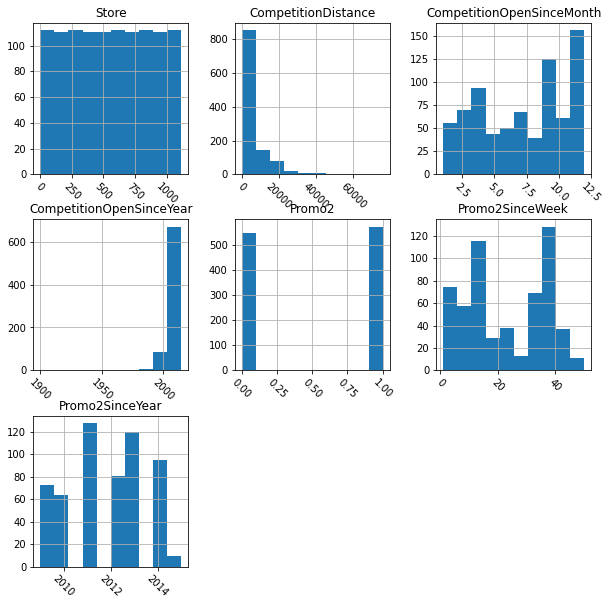

In [24]:
df.hist(xrot=-45,figsize=(10,10))
# Clear the text "residue"
plt

In [25]:
data = dvc.api.read(path='data/train.csv',repo='https://github.com/MohammedEsamaldin/Pharmaceutical-Sales-Prediction-across-multiple-stores.git')
db = pd.read_csv(io.StringIO(data),low_memory=False)
db.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [26]:
percent_missing(db)

The dataset contains 0.0 % missing values.


In [27]:
db.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [28]:
db.shape

(1017209, 9)

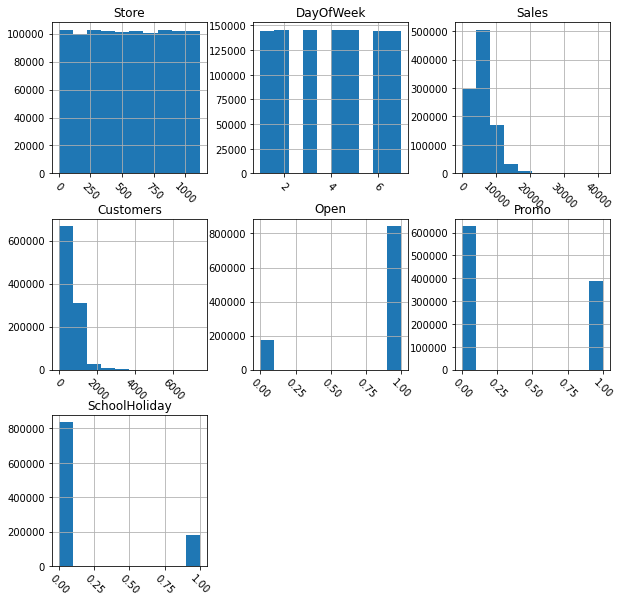

In [29]:
db.hist(xrot=-45,figsize=(10,10))

plt.show()

In [30]:
data = dvc.api.read(path='data/test.csv',repo='https://github.com/MohammedEsamaldin/Pharmaceutical-Sales-Prediction-across-multiple-stores.git')
ds = pd.read_csv(io.StringIO(data),low_memory=False)
ds.head(5)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [31]:
percent_missing(ds)

The dataset contains 0.0 % missing values.


In [32]:
ds =ds.dropna()

In [33]:
ds.isnull().sum()

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [34]:
# Merging the datasets

train_store = pd.merge(db, df2, how = 'left', on = "Store")
test_store = pd.merge(ds, df2, how = 'left', on = "Store")
train_store.columns , test_store.columns

(Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
        'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
        'CompetitionDistance', 'CompetitionOpenSinceMonth',
        'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
        'Promo2SinceYear', 'PromoInterval'],
       dtype='object'),
 Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
        'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
        'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
        'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
       dtype='object'))

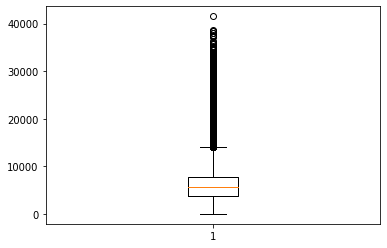

<Figure size 720x504 with 0 Axes>

In [35]:
plt.boxplot(train_store['Sales'])
fig = plt.figure(figsize =(10, 7))
plt.show()


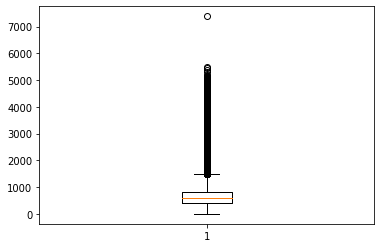

<Figure size 720x504 with 0 Axes>

In [36]:
plt.boxplot(train_store['Customers'])
fig = plt.figure(figsize =(10, 7))
plt.show()

In [37]:
def replace_outliers_iqr(df, columns):
  try:
     for col in columns:
          Q1, Q3 = df[col].quantile(
              0.25), df[col].quantile(0.75)
          IQR = Q3 - Q1
          cut_off = IQR * 1.5
          lower, upper = Q1 - cut_off, Q3 + cut_off

          df[col] = np.where(
              df[col] > upper, upper, df[col])
          df[col] = np.where(
              df[col] < lower, lower, df[col])
  except:
   return df


In [38]:
train_store['Sales', 'Customers'] =replace_outliers_iqr(train_store, ['Sales', 'Customers'])

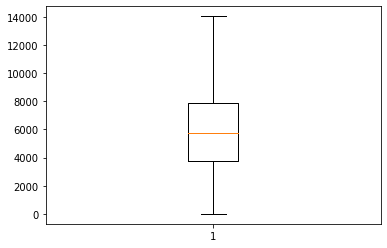

<Figure size 720x504 with 0 Axes>

In [39]:
plt.boxplot(train_store['Sales'])
fig = plt.figure(figsize =(10, 7))
plt.show()

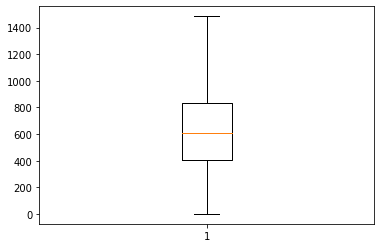

<Figure size 720x504 with 0 Axes>

In [40]:
plt.boxplot(train_store['Customers'])
fig = plt.figure(figsize =(10, 7))
plt.show()

In [41]:
test_store.to_csv('/content/drive/MyDrive/Pharmaceutical-Sales-Prediction-across-multiple-stores/data/test_store.csv',index=False)
train_store.to_csv('/content/drive/MyDrive/Pharmaceutical-Sales-Prediction-across-multiple-stores/data/train_store.csv',index=False)

In [42]:
!dvc remote add --default myremote gdrive:


Setting 'myremote' as a default remote.
ERROR: configuration error - config file error: Not inside a DVC repo


In [43]:
!dvc remote add -d dvc_remote /content/drive/MyDrive/Pharmaceutical-Sales-Prediction-across-multiple-stores/data/test_store.csv

Setting 'dvc_remote' as a default remote.
ERROR: configuration error - config file error: Not inside a DVC repo


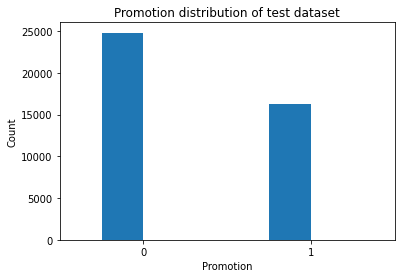

In [44]:
# Creating a test and train promo data frame for visualization

promo_test_df = test_store['Promo'].value_counts()
promo_train_df = train_store['Promo'].value_counts()
# Creating a data frame for visualization

test_df = pd.DataFrame(promo_test_df)
train_df = pd.DataFrame(promo_train_df)
# Renaming the columns for visualization

promo = [0,1]
test_df['Promotion'] = promo
train_df['Promotion'] = promo
test_df.rename(columns={'Promo':'Count'},inplace=True)
train_df.rename(columns={'Promo':'Count'},inplace=True)
# Plotting the test promo distribution 

test_df.plot(kind='bar',rot=0)
plt.xlabel('Promotion')
plt.ylabel('Count')
plt.title('Promotion distribution of test dataset')
plt.gca().get_legend().remove()
plt.show()